# Homework 5 - Clustering
## CSCI 5622 - Spring 2020
***
**Name**: Jacob Tiede
***

This assignment is due on Canvas by **11.59 PM on Monday, April 27th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [4]:
class DataIris:
    def __init__(self):
        data = load_iris()
        self.data = data.data[:, [1, 3]]
        self.target = data.target

# Part 1 [65 Pts]: K-means clustering


> First, we're going to build an implementation of K-means clustering as discussed in lecture. We will cluster a reduced form of the Iris dataset with a dimensionality of $d=2$ found in class `IrisData` above. <br>

Tasks :
Implement K-means clustering by completing the code in the class below : 

- [10 points] `initialize_centroids` : select K distinct points from the dataset `X` passed in the constructor and use them as the initial centroids. Store these centroids in the class variable `self.centroids` as an `np.array` of shape $K \times d$ where the $i$-th row represents a centroid and its would be class label is also $i$
- [10 points] `compute_distances` : compute the distance of each point $x_i$ to every centroid $m_k$ and return the result as a matrix `distance_matrix` of size $N \times K$ where N is the number of points and K is the chosen number of clusters to be found. A cell `(i,k)` shall contain the euclidean distance between point $x_i$ and centroid $m_k$
- [10 points] `compute_cluster_assignment` : given the distance matrix of size $N \times K$ return a array of labels in which each element is an integer in the range $[0, K-1]$ and it represents which centroid in the centroid array `self.centroids` that point belongs to.
- [10 points] `compute_centroids` : You shall have the new assignment of clusters contained in the incoming `labels` array to your $N$ points. Compute the new centroids depending on the new set of points that has been alloted to each cluster. 
- [10 points] `cluster` : This shall contain you main loop which implements the algorithm described above. You shall sequentially call the methods above to find the $K$ centroids(or means). Keep performing this loop until one of the following conditions is met: 1) you perform `epochs` number of iterations; or 2) the average euclidian difference between old and new centroids goes below 0.01. At the end of each epoch call the method `show_progress()` to show where the centroids are after making the necessary updates.
- [The Elbow Analysis function is used in the bonus problem below]

In [5]:
class KMeansClustering:
    def __init__(self, X, K):
        '''
        Params : 
            X : (np.ndarray) of dimension (N, d) N is the number of points
            K : (int) number of means/centroids to evaluate
            epochs : (int) maximum number of epochs to evaluate for the centroids
        '''
        self.X = X
        self.K = K
        self.centroids = self.initialize_centroids()
        
    def initialize_centroids(self):
        '''
        Randomly select K distinct points from the dataset in self.X
        Params : 
            None
        RETURN :
            means : (np.ndarray) of the dimension (K, d)
        '''
        #choose K random integers from 0 to N-1 (these will represent the indicies that will be the initial 
        #centroids)
        indicies = np.random.randint(int(self.X.shape[0]), size = self.K)
        #Use these rows for the means matrix
        means = self.X[indicies,:]
        return means
    
    def compute_distances(self):
        '''
        Comupute a distance matrix of size (N, K) where each cell (i, j) represents the distance between 
        i-th point and j-th centroid. We shall use Euclidean distance here.
        
        PARAMS:
            centroids : (np.ndarray) of the dimension (K, d)
        RETURN:
            distance_matrix : (np.ndarray) of the dimension (N, K)
        '''
        #Initialize the distance_matrix
        distance_matrix = np.zeros((self.X.shape[0], self.centroids.shape[0]))
        #for each centroid
        for i in range(0, self.centroids.shape[0]):
            #for each observation in X
            for j in range(0, self.X.shape[0]):
                #find dist between ith centroid and jth point
                dist = np.linalg.norm(self.centroids[i,:]-self.X[j,:])
                distance_matrix[j,i] = dist
        return distance_matrix
            
    
    def compute_cluster_assignment(self, distance_matrix):
        '''
        Comupute a distance matrix of size (N, K) where each cell (i, j) represents the distance between 
        i-th point and j-th centroid. We shall use Euclidean distance here.
        
        PARAMS:
            distance_matrix : (np.ndarray) of the dimension (N, K)
        RETURN:
            labels : (np.ndarray) of the size (N)
        '''
        #Initialize labels
        labels = np.zeros(self.X.shape[0])
        #for each data point
        for i in range(0, labels.shape[0]):
            #Make temp for convience
            temp = list(distance_matrix[i,:])
            #set label to minimum distance point
            labels[i] = int(temp.index(min(temp)))
        return labels
    
    def compute_centroids(self, labels):
        '''
        Randomly select K distinct points from the dataset in self.X
        Params : 
            labels : (np.ndarray) of the dimension (N) where each i-th item reperesents the closest
            centroid among the K centroids. Each value here must be between 0 and K-1.
        RETURN :
            updated_means : (np.ndarray) of the dimension (K, d)
        '''
        #Initialize the updated_means
        updated_means = np.zeros((self.K, int(self.X.shape[1])))
        #For each centroid find it's new position
        for i in range(0, self.K):
            #compute the new centroid positions
            updated_means[i,:] = np.mean(self.X[labels == i,:], axis = 0)
        return updated_means
    
    def cluster(self, epochs, showProg = 1):
        '''
        Implement the K-means algorithm here as described above. However loop for a maximum of self.epochs.
        Ensure that you have a condition that checks whether the epochs have changed since the last epoch or not
        For this use a threshold of change of 0.01.
        
        PARAMS:
            epochs : (integer) maximum number of epochs
        RETURN:
            centroids : (np.ndarray) of the size (K, d) also store in a class variable self.centroids
        '''
        #initialize avg_diff as the average difference between two centroids
        avg_diff = 1000
        #keep track of the current epoch
        currEpoch = 1
        #initialize something to keep track of the old centroids
        self.centroids = self.initialize_centroids()
        while currEpoch <= epochs and avg_diff > .01:
            #find the distance matrix
            distMatrix = self.compute_distances()
            #assign labels according to the distance matrix
            labels = self.compute_cluster_assignment(distMatrix)
            #compute new centroids
            newCentroids = self.compute_centroids(labels)
            #find average change in distance between the centroids:
            avg_diff = np.mean(np.linalg.norm(newCentroids-self.centroids))
            #update our centroids
            self.centroids = newCentroids
            if showProg == 1:
                self.show_progress(currEpoch)
            #start a new epoch
            currEpoch += 1
        return(self.centroids)
    
    def show_progress(self, epoch):
        '''
        PARAMS:
            epoch : (integer) tells which epoch is it
        RETURN:
            None
        '''
        plt.plot(self.X[:, 0], self.X[:, 1], 'o', color='y')
        for i in range(self.K):
            plt.plot(self.centroids[i, 0], self.centroids[i, 1], 'o', color='k')
        plt.title('Centroids at epoch : {}'.format(epoch))
        plt.show()
        
    def elbow_analysis(self, k_range):
        '''
        PARAMS:
            k_range : (list of +ve integers) contains the K number of hyperparameters k to peform 
            the analysis over
        RETURN:
            avg_variance : (list of float) list of size K. contains the average variance of clusters corresponding to each 
            to each hyperparameter k
        '''
        #Initialize a vector to keep track of average variances
        avg_variance = []
        #keep track of the old k so we won't change anything permently about an instance of this object
        oldK = self.K
        #for each k we want to test
        for i in k_range:
            #set k to the one to test
            self.K = i
            #get the clusters, the second parameter tells it not to print the plots
            ithCentroids = self.cluster(20, 0)
            #get the distance matrix to find variance
            dist = self.compute_distances()
            #get cluster assignments
            labels = self.compute_cluster_assignment(dist)
            #find variances and take the average:
            variances = []
            #for each cluster
            for j in range(0, self.K):
                #set for convenience, get only points that belong to cluster j
                temp = self.X[labels == j, :]
                #if we use a ton of clusters some of them might not have any points in them, so only append variances
                #that exist
                if len(temp) !=0:
                    variances.append(np.linalg.norm(np.var(temp, axis = 0)))
            #get average variance from all the clusters
            avg_variance.append(np.mean(variances))
        #change k back
        self.K = oldK
        return avg_variance


In [6]:
import unittest

class KMeansTester(unittest.TestCase):
    def setUp(self):
        self.X = np.array([[0.1, 0.3], [0.4, 0.6], [0.2, 0.4], [3.1, 3.1], [3.5, 2.9]])
        self.cluster_obj_1 = KMeansClustering(self.X, 2)
        self.cluster_obj_2 = KMeansClustering(self.X, 2)
        self.cluster_obj_3 = KMeansClustering(self.X, 2)
        self.cluster_obj_4 = KMeansClustering(self.X, 2)
        
    def test_initialize_centroids(self):
        """
        Test initialize_centroids function from KMeansClustering
        """
        means = self.cluster_obj_1.initialize_centroids()
        self.assertEqual(means.shape[0], 2)
        self.assertEqual(means.shape[1], 2)
        
    def test_compute_distances(self):
        """
        Test compute_distances function from KMeansClustering
        """
        self.cluster_obj_2.centroids = self.X[:2, :]
        distance_matrix = self.cluster_obj_2.compute_distances()
        self.assertEqual(round(distance_matrix[0,0], 2), 0.0)
        self.assertEqual(round(distance_matrix[0,1], 2), 0.42)
        
    def tests_compute_cluster_assignment(self):
        """
        Test compute_cluster_assignment function from KMeansClustering
        """
        self.cluster_obj_3.centroids = self.X[:2, :]
        distance_matrix = self.cluster_obj_3.compute_distances()
        labels = self.cluster_obj_3.compute_cluster_assignment(distance_matrix)
        self.assertEqual(labels[0], 0)
        self.assertEqual(labels[1], 1)
        self.assertEqual(labels[2], 0)
        
    def test_compute_centroids(self):
        """
        Test compute_centroids function from KMeansClustering
        """
        self.cluster_obj_4.centroids = self.X[:2, :]
        distance_matrix = self.cluster_obj_4.compute_distances()
        labels = self.cluster_obj_4.compute_cluster_assignment(distance_matrix)
        new_means = self.cluster_obj_4.compute_centroids(labels)
        self.assertEqual(round(new_means[0, 0], 2), 0.15)
        self.assertEqual(round(new_means[0, 1], 2), 0.35)
        
    
tests = KMeansTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

....
----------------------------------------------------------------------
Ran 4 tests in 0.015s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

> [5 pts] In the cell below, perform K-means clustering on the `IrisData` with `K=3` for up to __20 epochs__. Plot the centroid locations at each epoch using the method `show_progress` already written for you.

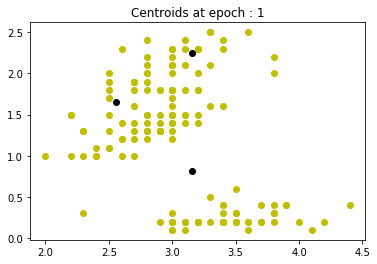

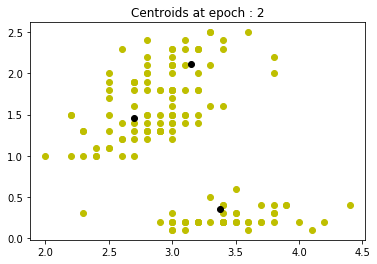

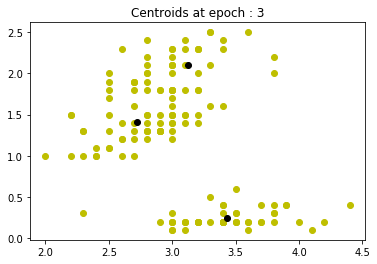

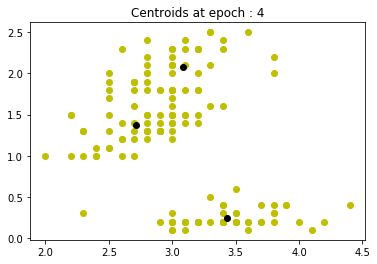

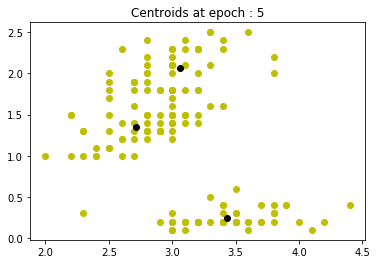

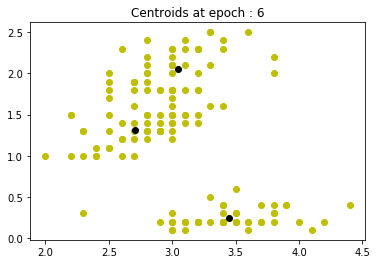

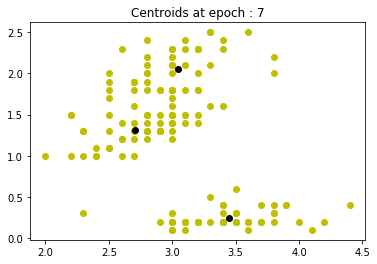

In [5]:
irData = DataIris()
Kcluster = KMeansClustering(irData.data, 3)
finalCentroids = Kcluster.cluster(20)

> [10 pts] The original Iris dataset was a labelled dataset with classes assigned to each point. The `show_progress` method plots all the points as yellow without giving points of different classes different colors along with the centroids as black points. Now that you have performed clustering, try to plot the points in the dataset along with the computed centroids, but this time color the dataset points according to their true label in `IrisData` (see the attribute `target` for true class labels in `IrisData`). Comment on what you observe in the Markdown cell following the code cell below.

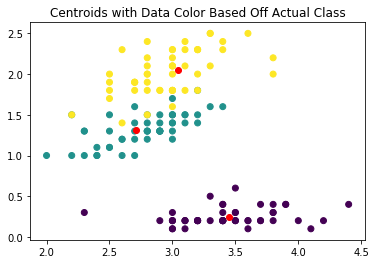

In [6]:
plt.scatter(irData.data[:, 0], irData.data[:, 1], c=irData.target)
for i in range(finalCentroids.shape[0]):
    plt.plot(finalCentroids[i, 0], finalCentroids[i, 1], 'o', color='r')
plt.title('Centroids with Data Color Based Off Actual Class')
plt.show()

The centroids do look to be in approximently the right location, but some of the yellow points (namely the ones that are sort of within the green ones) are going to be missclassified, but it still looks almost as good as an approximation could be without having the true labels.

## Elbow Analysis [Bonus 15 Pts]

Our Iris dataset should have an expectation of three clusters (as seen in the match to the targets?), but we want to see if that is borne out by an Elbow Test. Add a function tpdate the elbow_analysis function in your KMeansClustering Class above to compute the average within-cluster variance, run this within cluster variance for k = 1 to k = 10 and plot the results below, and discuss your results.

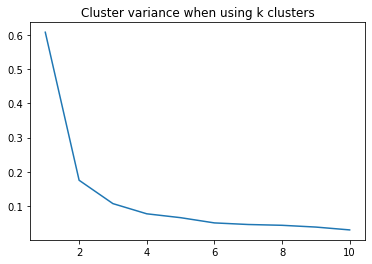

In [10]:
Kcluster = KMeansClustering(irData.data, 3)
k_range = [1,2,3,4,5,6,7,8,9,10]
avg_variance = Kcluster.elbow_analysis(k_range)
plt.plot(k_range, avg_variance)
plt.title("Cluster variance when using k clusters")
plt.show()

It looks like the largest change in slopes of the line is actually at K = 2, so we would expect there to only be two clusters in the data that we have. This should make sense, becuase looking at the data we have plotted above it looks like there are only two clusters, and it is only because we know that there is 3 clusters (from outside knowledge) that we might even assume that there was more than 2.

# 1-D data from Gaussian Distributions

In [11]:
class Data1D:
    def __init__(self):
        self.means = [-4.0, 3.5, 10.6]
        self.variances = [1.5, 1.2, 1.0]
        X = []
        for m, v in zip(self.means, self.variances):
            X += list(np.random.normal(m, np.sqrt(v), size=(100)))
        self.means, self.variances = np.array(self.means), np.array(self.variances)
        X = np.array(X)
        self.X = X

# Part 2 [35 Pts]: Gaussian Mixture Model

GMMs are based on the assumption that all data points come from a fine mixture of Gaussian distributions with unknown parameters. They are parametric generative models that attempt to learn the true data distribution. Hence, once we learn the Gaussian parameters, we can generate data from the same distribution as the source. <br>

Like K-Means, GMMs also demand the number of clusters K as an input to the learning algorithm. However, there is a key difference between the two. K-Means can only learn clusters with a circular form. GMMs, on the other hand, can learn clusters with any elliptical shape. <br>

K-Means only allows for an observation to belong to one, and only one cluster. Differently, GMMs give probabilities that relate each example with a given cluster. In other words, GMMs allow for an observation to belong to more than one cluster — with a level of uncertainty. <br>

Assuming one-dimensional data(as is the data for the problem we will solve) and the number of clusters K equals 3, GMMs attempt to learn 9 parameters.
- 3 parameters for the means i.e $\mu_k$
- 3 parameters for the variances i.e $\sigma^2_k$
- 3 scaling parameters $\phi_k$

We estimate these parameters using Expectation Maximization which works as follows:
1. First we calculate the likelihood of each point. Below is the Probability Density Function we will use to evaluate the likelihood
$$f(x|\mu_k, \sigma^2_k) = \frac{1}{\sqrt{2\pi\sigma^2_k}}exp\Big(-\frac{(x-\mu_k)^2}{2\sigma^2_k}\Big)$$

2. Next we estimate the posterior probability of each point with repect to certain cluster. This tells us what is the probability that a certain point belongs to a certain cluster
$$b_k^{(i)} = \frac{f(x^{(i)}|\mu_k, \sigma^2_k)\phi_k}{\sum_{k=1}^{K}f(x^{(i)}|\mu_k, \sigma^2_k)\phi_k}$$

3. Now we estimate the parameters as
$$\mu_k = \frac{\sum_i b_k^{(i)}x^{(i)}}{\sum_i b_k^{(i)}}$$
$$\sigma^2_k = \frac{\sum_i b_k^{(i)}(x^{(i)} - \mu_k)^2}{\sum_i b_k^{(i)}}$$
$$\phi_k = \frac{1}{N}\sum_i b_k^{(i)}$$

4. We repeat the above steps until the parameters dont change beyond a certain threshold or we reach the maximum number of epochs

> Now we shall implement Gaussian Mixture Model for a 1-D dataset composed of points from multiple Gaussian Distributions. You can find the data in `Data1D` above.
> Complete the methods below : 
- [5 points] `compute_pdf` : given a scalar value x(a 1-D point) and integer k find the value of the Probability Density Function(p.d.f) as defined above
- [5 points] `compute_pdf_matrix` : Create a matrix of size $N\times K$ which contains the p.d.f value for every  point w.r.t each cluster
- [5 points] `compute_posterior` : Given the p.d.f matrix computed from previous function, now create a matrix of size $N\times K$ which contains the posterior probability value for every  point w.r.t each cluster as using the formula described above
- [5 points] `reestimate_params` : Given the posterior probability matrix, re-estimate the 3 sets of parameters 
- [5 points] `exp_maximize` : the main training loop that runs for `epochs` number of times. You must also incorporate logic here to break the loop if the parameters do not change beyond a certain threshold just like you did before in K-means. We give you the liberty of deciding how that will work and what the threshold value should be. Note that finally the parameters should be in close range with the parmaters the data distribution was created with in class `Data1D`.

In [70]:
class GaussianMixtureModel1D:
    def __init__(self, X, K):
        self.X = X
        self.K = K
        self.mean, self.variance, self.weight = self.initialize_parameters()
        
    def initialize_parameters(self):
        mean = np.random.choice(self.X, self.K)
        variance = np.random.random_sample(size=self.K) * 2
        weights = np.ones(self.K) / self.K
        return mean, variance, weights
    
    def compute_pdf(self, x, k):
        '''
        Evaluate the p.d.f value for 1-D point i.e scalar value for the w.r.t to the k-th cluster
        Params : 
            x : (float) the point
            k : (integer) the k-th elements from mean, variance and weights correspond to k-th cluster parameters.
                Use those to estimate your result.
        RETURN :
            result : (float) evalutated using the formula described above
        '''
        #using formula above
        return 1/(np.sqrt(2*np.pi*self.variance[k]))*np.exp(-1*(x-self.mean[k])**2/(2*self.variance[k]))
        
    def compute_pdf_matrix(self):
        '''
        Evaluate the p.d.f martix by calling compute_pdf() for each combination of x and k
        Params : 
            None
        RETURN :
            result : (np.array) matrix of size N X K containing p.d.f values
        '''
        #initialize result:
        result = np.zeros((self.X.shape[0], self.K))
        #for each observation in X
        for i in range(0, result.shape[0]):
            #for each of the K distributions we are looking at
            for j in range(0, result.shape[1]):
                #calculate pdf
                result[i,j] = self.compute_pdf(self.X[i], j)
        return result
    
    def compute_posterior(self, pdf_matrix):
        '''
        Evaluate the posterior probability martix as described by the formula above
        Params : 
            pdf_matrix : (np.array) matrix of size N X K containing p.d.f values
        RETURN :
            result : (np.array) matrix of size N X K containing posterior probability values
        '''
        #initialize result:
        result = np.zeros((self.X.shape[0], self.K))
        #for each observation in X
        for i in range(0, result.shape[0]):
            #for each of the K distributions we are looking at
            for j in range(0, result.shape[1]):
                #use formula above
                result[i,j] = pdf_matrix[i,j]*self.weight[j]/np.dot(pdf_matrix[i,:], self.weight)
        return result
    
    def reestimate_params(self, posterior_matrix):
        '''
        Re-estimate the cluster parameters as described by the formulae above and 
        store them in their respective class variables
        Params : 
            posterior_matrix : (np.array) matrix of size N X K containing posterior probability values
        RETURN :
            None
        '''
        #set to make for loops easier to write
        tempK = posterior_matrix.shape[1]
        #apply formulas as written above:
        for i in range(0, tempK):
            self.mean[i] = np.dot(posterior_matrix[:,i], self.X)/np.sum(posterior_matrix[:,i])
        for i in range(0, tempK):
            self.variance[i] = np.dot(posterior_matrix[:,i], np.square(self.X-self.mean[i]))/np.sum(
                                                                                          posterior_matrix[:,i])
        for i in range(0, tempK):
            self.weight[i] = 1/self.X.shape[0]*np.sum(posterior_matrix[:,i])
        
            
    def exp_maximize(self, epochs):
        '''
        Peform the expectation-maximization method as dicussed above by calling the functions in their 
        respective sequence. Also plot the progress of the process by calling the plot_progress function
        after every regular interval of epochs.
        Params : 
            epochs : (integer) maximum number of epochs to run the loop for
        RETURN :
            None
        '''
        #keep track of the current epoch as a stopping condition
        currentEpoch = 1
        #initialize the difference between parameters
        diff = 10
        while currentEpoch <= epochs and diff > .01:
            #keep track of the mean of old parameters
            oldMean = np.mean(self.mean)
            oldVariance = np.mean(self.variance)
            oldWeight = np.mean(self.weight)
            #compute new paramters
            pdfMatrix = self.compute_pdf_matrix()
            posteriorMatrix = self.compute_posterior(pdfMatrix)
            self.reestimate_params(posteriorMatrix)
            #set difference as the mean difference of mean parameters
            diff = np.abs(np.mean((np.mean(self.mean) - oldMean, 
                            np.mean(self.variance) - oldVariance,
                            np.mean(self.weight) - oldWeight)))
            #plot the progress
            self.plot_progress()
            #update current epoch
            currentEpoch += 1
    
    def plot_progress(self):
        points = np.linspace(np.min(self.X),np.max(self.X),500)
        plt.figure(figsize=(10,4))
        plt.xlabel("$x$")
        plt.ylabel("pdf")
        plt.plot(self.X, 0.1*np.ones_like(self.X), 'x', color='navy')
        for k in range(self.K):
            plt.plot(points, [self.compute_pdf(p, k) for p in points])
        plt.show()

In [52]:
import unittest

class GMMTester(unittest.TestCase):
    def setUp(self):
        self.X = np.array([0.1, 1.2, 0.3, 0.4, 0.3, 3.5, 2.9])
        self.means = [-2.0, 2.5]
        self.variances = [1.0, 1.3]
        self.weights = [0.1, 0.2]
        
        self.cluster_obj_1 = GaussianMixtureModel1D(self.X, 2)
        self.cluster_obj_1.mean = self.means
        self.cluster_obj_1.variance = self.variances
        self.cluster_obj_1.weight = self.weights
        
        self.cluster_obj_2 = GaussianMixtureModel1D(self.X, 2)
        self.cluster_obj_2.mean = self.means
        self.cluster_obj_2.variance = self.variances
        self.cluster_obj_2.weight = self.weights
        
        self.cluster_obj_3 = GaussianMixtureModel1D(self.X, 2)
        self.cluster_obj_3.mean = self.means
        self.cluster_obj_3.variance = self.variances
        self.cluster_obj_3.weight = self.weights
        
        self.cluster_obj_4 = GaussianMixtureModel1D(self.X, 2)
        self.cluster_obj_4.mean = self.means
        self.cluster_obj_4.variance = self.variances
        self.cluster_obj_4.weight = self.weights
        
    def test_compute_pdf(self):
        """
        Test compute_pdf function from GaussianMixtureModel1D
        """
        pdf = self.cluster_obj_1.compute_pdf(self.X[0], 1)
        self.assertEqual(round(pdf, 3), 0.038)
        
    def test_compute_pdf_matrix(self):
        """
        Test compute_pdf_matrix function from GaussianMixtureModel1D
        """
        pdf_matrix = self.cluster_obj_2.compute_pdf_matrix()
        self.assertEqual(round(pdf_matrix[0,0], 3), 0.044)
        self.assertEqual(round(pdf_matrix[0,1], 3), 0.038)
        
    def tests_compute_posterior(self):
        """
        Test compute_posterior function from GaussianMixtureModel1D
        """
        pdf_matrix = self.cluster_obj_3.compute_pdf_matrix()
        posterior_matrix = self.cluster_obj_3.compute_posterior(pdf_matrix)
        self.assertEqual(round(posterior_matrix[0,0], 2), 0.37)
        self.assertEqual(round(posterior_matrix[0,1], 2), 0.63)
        
    def test_reestimate_params(self):
        """
        Test reestimate_params function from GaussianMixtureModel1D
        """
        pdf_matrix = self.cluster_obj_4.compute_pdf_matrix()
        posterior_matrix = self.cluster_obj_4.compute_posterior(pdf_matrix)
        self.cluster_obj_4.reestimate_params(posterior_matrix)
        self.assertEqual(round(self.cluster_obj_4.mean[0], 2), 0.24)
        self.assertEqual(round(self.cluster_obj_4.variance[0], 2), 0.02)
        self.assertEqual(round(self.cluster_obj_4.weight[0], 2), 0.13)
        
    
tests = GMMTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

....
----------------------------------------------------------------------
Ran 4 tests in 0.007s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

> [5 pts] Using the Gaussian Mixture Model you have built, fit a model for the 1-D data in `Data1D` with $K=3$. Train the model for 20 epochs and plot the progress of the model using the function `plot_progress` in the code cell below.

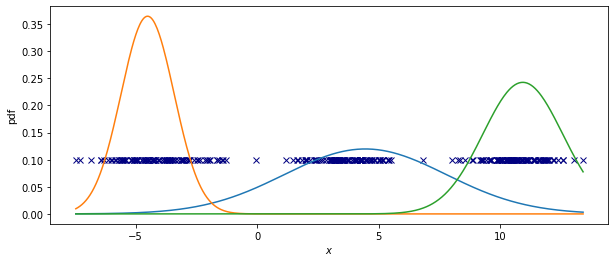

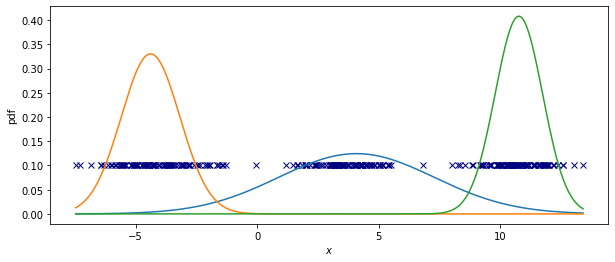

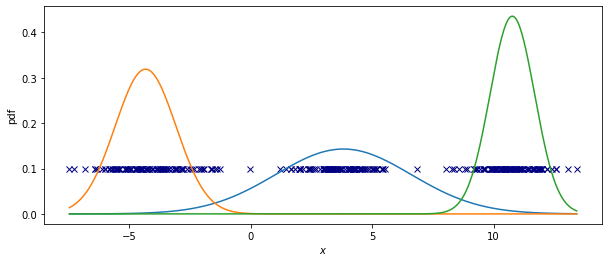

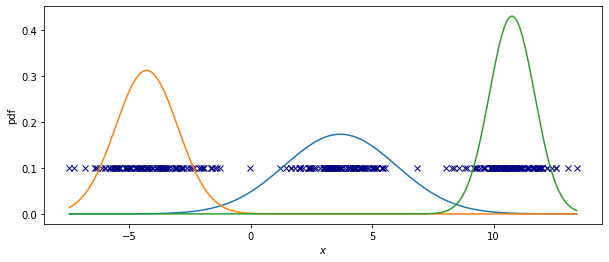

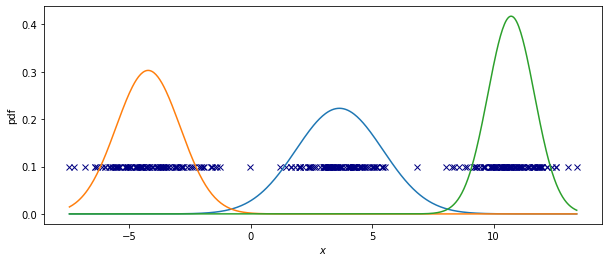

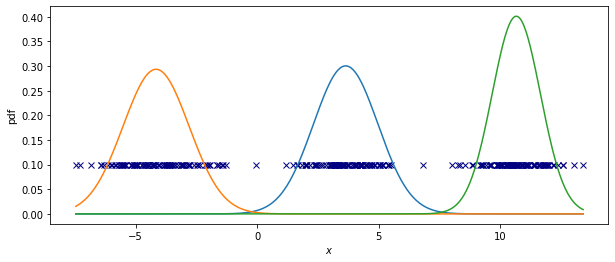

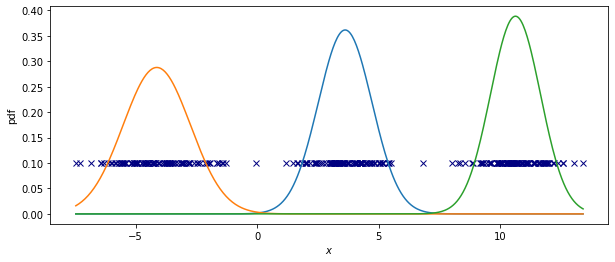

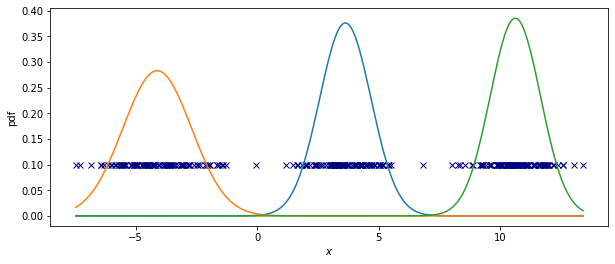

Estimated means:
[-4.10899595  3.63302056 10.6287029 ]
Actual means:
[-4.   3.5 10.6]
Estimated variances:
[1.07082892 1.12401765 1.984575  ]
Actual means:
[1.  1.2 1.5]


In [74]:
data = Data1D()
cluster_obj = GaussianMixtureModel1D(data.X, 3)
cluster_obj.exp_maximize(20)
print("Estimated means:")
print(np.sort(cluster_obj.mean))
print("Actual means:")
print(np.sort(data.means))
print("Estimated variances:")
print(np.sort(cluster_obj.variance))
print("Actual means:")
print(np.sort(data.variances))